# CRAFT COCKTAIL RECOMMENDER PROJECT

![title](img/barman-behind-bar.jpg)

## BUILT FOR AMATEUR MIXOLOGISTS

I love craft cocktails, but during COVID I wasn't able to go out and enjoy them. During the lockdown, I decided to learn how to make my own cocktails. I bought a great cocktail book [DEATH & CO](https://www.amazon.com/Death-Co-Modern-Classic-Cocktails/dp/1607745259) and built up my home bar. 

One thing I miss is being able to interact with a bartender and describe in vague terms what kind of cocktail I want. For example I can ask, **"Do you have anything kinda smoky but spicy?"** A good bartender can come up with a good cocktail to match. 

## BUILDING A MODEL TO MAP QUERIES TO COCKTAILS
For this project, I decided to build a model that uses NLP to rank cocktails that match a user's query. 

**STEPS:**

1. Get the data
2. Extract ingredient categories for the cocktails
3. Build the training set from Wikipedia and subreddit data
4. Train the model and visualize results
    


## GETTING THE DATA
The most important thing for me was to find a good source of creative cocktail recipes (no Cosmos messing up my dataset!). 
I found a great site upneat.rocks that had exactly what I was looking for. All cocktails from 3 famous craft cocktail books, including Death & Co! 

I used Beautiful Soup (code in <b>upneat_scraper.py</b>) to extract all the contents

C:\Users\donah\anaconda3\envs\machineLearning\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':


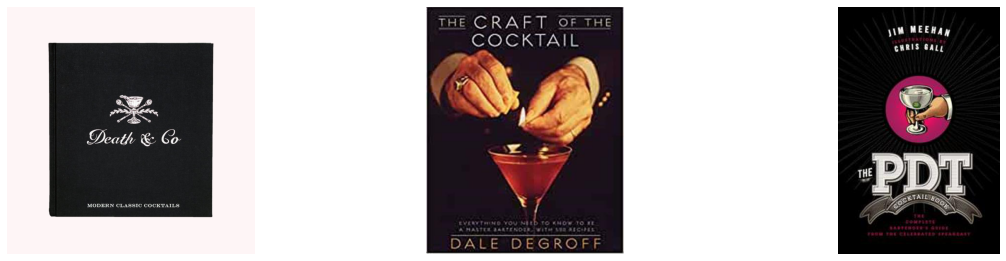

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
images = []
image_list = ['img/D&C_book.jpg','img/craftofcocktail_book.jpg','img/PDT_book.jpg',]
for img_path in image_list:
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize=(20,10))
columns = 3
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)



## EXTRACT INGREDIENTS
Ingredients had to be abstracted into categories for this to work. As seen in the example below, brand names are often found in the recipes (<em>i.e. Siembra Azul Blanco Tequila</em>) and I want this to simply be <em>Tequila</em>. This was somewhat arbitrary, but I managed to extract around 160 unique ingredients from the cocktail database. 

In [2]:
import dill
with open("cocktail_data/cocktails.pickle", "rb") as file:
    cocktails = dill.load(file)  

cocktail = 'Gilda Cocktail'
print(cocktail.upper())
for ingredient in cocktails[cocktail]['ingredients']:
    print(ingredient)


GILDA COCKTAIL
2 ounces Siembra Azul Blanco Tequila
.5 ounce Pineapple Juice
.5 ounce Lime Juice
.5 ounce Cinnamon Bark Syrup
Wheel of Lime (Garnish)


## BUILD A TRAINING SET FROM WIKIPEDIA AND REDDIT DATA

I selected the most common ingredients and scraped Wikipedia and subreddits (when they existed) corresponding to these ingredients (code in <b>create_wiki_diciontaries.py</b> and <b>create_reddit_dictionaries.py</b>) 

Next, I separated all the ingredients into 5 general categories that cocktails tend to have:
1. Spirits (Rum, Tequila, etc.)
2. Juices (Lemon, Lime, etc.
3. Liqueurs (Triple Sec, Kahlua, etc.)
4. Syrups (Simple syrup, grenadine, etc.)
5. Misc (Coffee, cream, etc.)

For each of these 5 categories, I built a model using Scikit-Learn's TFID Vectorizer to discover which words tended to be more frequent for a given ingredient (code in **create_NLP_models.py**)

## DEMO

### The model finds the most likely ingredients that match a query. Afterwards, cosine similarity is used to determine the closest cocktails to this query. I combine these results with simpler search methods that look for the query in the cocktail description and ingredients. 


Everything is bundled in a CocktailQuery() object which the user can load and use to test different queries. There are a few useful methods:
- plot_cocktail_map(N): Returns the top N cocktails projected onto a 2d map that was derived with [Multidimensional Scaling](https://en.wikipedia.org/wiki/Multidimensional_scaling) on the set of cocktail ingredients. 
- get_weights(): This gives the ingredients and weights that were used with cosine similarity to find the nearest cocktail
- plot_ingredient_scores(category): Shows the model results for each ingredient within a given category (spirits, juices, liqueurs, syrups, misc). 
- get_recipe(cocktail_name): Returns the recipe for a given cocktail

# ASK FOR A SMOKY DAIQUIRI:
- Daiquiris traditionally have rum and lime. Will it find a variation with Mezcal or a smoky whiskey?

In [3]:
from CocktailQuery import CocktailQuery, nlp

In [17]:
C = CocktailQuery('smoky daiquiri') 
C.plot_cocktail_map(20) # Returns top 20 cocktails

alt.HConcatChart(...)

### Top hit is the Jovencourt Daiquiri:

In [6]:
C.get_recipe('Jovencourt Daiquiri')

JOVENCOURT DAIQUIRI
2 ounces Barbancourt White Rum
.25 ounce Del Maguey Vida Mezcal
.75 ounce Lime Juice
.75 ounce Simple Syrup

Shake all the ingredients with ice, then strain into a coupe. No garnish.


PHIL WARD, 2007 This cocktail was my first epiphany about using mezcal in a mixed drink. Doing so is common now, but nobody was mixing with it back then.—PW



In [7]:
C.get_weights() # Gives ingredient weights that were used to find the best match

{'rum': 1, 'mezcal': 0.5, 'lime juice': 1}

In [8]:
C.plot_ingredient_scores('spirits') 

alt.Chart(...)

In [9]:
C.plot_ingredient_scores('juices') 

alt.Chart(...)

# ANOTHER EXAMPLE (MORE ABSTRACT): Spicy Island

In [10]:
C = CocktailQuery('spicy island') 
C.plot_cocktail_map(20) # Returns top 20 cocktails

alt.HConcatChart(...)

### That second hit looks interesting:

In [11]:
C.get_recipe('Añejo Highball') # Rum + ginger beer sounds a bit island spicy!

AÑEJO HIGHBALL
1.5 ounces Añejo Rum
.5 ounce Curaçao
2 ounces Ginger Beer
.25 ounce Lime Juice
2 dashes Angostura Bitters
wheel of Lime (Garnish)
slice Orange (Garnish)

Build in a highball glass and fill with ginger beer. Garnish with the lime wheel and orange slice.


I created the Añejo Highball as a tribute to the great bartenders of Cuba, in particular Constante Ribalaigua Vert, from Habana's Floridita bar, who created the Papa Doble Daiquiri for Ernest Hemingway. The Añejo evokes the spiciness of the Caribbean rum drinks; curaçao, lime, and rum are the holy trinity of the island-rum drink.



In [12]:
C.get_weights()

{'rum': 1,
 'bourbon': 0.5,
 'falernum': 1,
 'allspice liqueur': 0.5,
 'ginger syrup': 1,
 'orgeat': 0.5,
 'hot sauce': 1}

In [13]:
C.plot_ingredient_scores('spirits') 

alt.Chart(...)

In [14]:
C.plot_ingredient_scores('syrups') 

alt.Chart(...)

In [15]:
C.plot_ingredient_scores('misc') 

alt.Chart(...)

### Want something to go with a cigar? 
- Seems to return a lot of whiskey drinks

In [16]:
C = CocktailQuery('cigar') 
C.plot_cocktail_map(20) # Returns top 20 cocktails

alt.HConcatChart(...)